# House Price Prediction

by Aansh Sagar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Raw_Housing_Prices.csv")

In [3]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

<AxesSubplot:xlabel='Sale Price'>

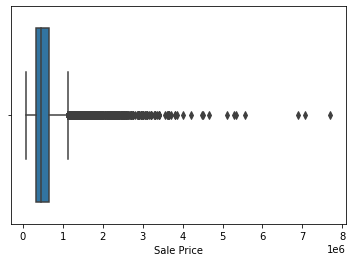

In [6]:
sns.boxplot(data['Sale Price'])

<AxesSubplot:ylabel='Frequency'>

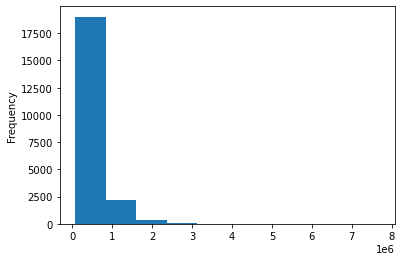

In [7]:
data['Sale Price'].plot.hist()

In [8]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

## Treating Outliers in our target variable

In [9]:
q1 = data['Sale Price'].quantile(0.25)
q3 = data['Sale Price'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
lower_limit, upper_limit

(-162625.0, 1129575.0)

In [10]:
# Since lower limit is a negative value, We will set the lower limit as the minimum value in the target variable
lower_limit=min(data['Sale Price'])

In [11]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value
data['Sale Price']=data['Sale Price'].apply(limit_imputer)

<AxesSubplot:xlabel='Sale Price'>

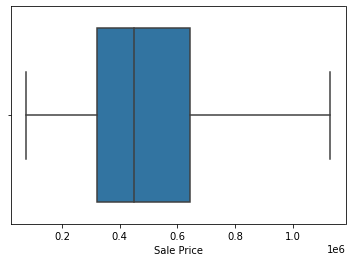

In [12]:
sns.boxplot(data['Sale Price'])

* The boxplot shows that now there are no missing values in out target variable

In [13]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

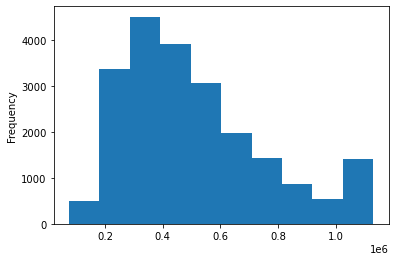

In [14]:
data['Sale Price'].plot.hist()

## Treating missing values

In [15]:
data.dropna(subset=['Sale Price'],axis=0,inplace=True)

In [16]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [17]:
numerical_columns=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Latitude','Longitude','Living Area after Renovation (in Sqft)']

In [18]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan, strategy='median')
data[numerical_columns]=imputer.fit_transform(data[numerical_columns])

In [19]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [20]:
from sklearn.impute import SimpleImputer
column=data['Zipcode'].values.reshape(-1,1)
x=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['Zipcode']=x.fit_transform(column)


## We have treated all the missing values

In [21]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

## Feature Engineering

In [22]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

<BarContainer object of 5 artists>

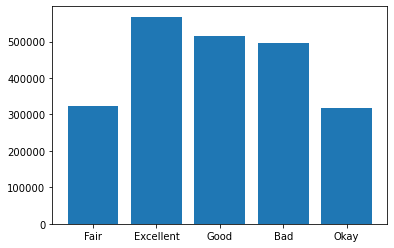

In [23]:
plt.bar(data['Condition of the House'].unique(), data.groupby('Condition of the House')['Sale Price'].mean())

In [24]:
data['Overall Grade'].unique()

array([ 7,  6,  8, 10,  9,  5,  4,  3,  2,  1], dtype=int64)

In [25]:
def luxury_home(row):
    count=0
    if row[0]=='Yes':
        count+=1
    if row[1] in ['Good','Excellent']:
        count+=1
    if row[2]>=8:
        count+=1
    if count>=2:
        return 'Yes'
    else:
        return 'No'
    
data['luxury_home']=data[["Waterfront View","Condition of the House","Overall Grade"]].apply(luxury_home, axis=1)
data['luxury_home'].unique() 

array(['No', 'Yes'], dtype=object)

In [26]:
mapping={'Bad':'0',
        'Good':'3',
        'Okay':'1',
        'Fair':'2',
        'Excellent':'4'}
data['Condition of the House']=data['Condition of the House'].map(mapping)

In [27]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),luxury_home
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,No
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [28]:
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [29]:
mapping={'None':'0',
        'Once':'1',
        'Twice':'2',
        'Thrice':'3',
        'Four':'4'}
data['No of Times Visited']=data['No of Times Visited'].map(mapping)

In [30]:
data.drop(columns=['ID'],inplace=True)

In [31]:
data.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),luxury_home
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,2,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,2,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,No
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,2,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,4,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,2,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [32]:
data['Ever Renovated']=np.where(data['Renovated Year']==0,'No','Yes')

In [33]:
data['Purchase Year']=pd.DatetimeIndex(data['Date House was Sold']).year

In [34]:
data['Year since renovation']=np.where(data['Ever Renovated']=='Yes',abs(data['Purchase Year']-data['Renovated Year']),0)

In [35]:
data.drop(columns=['Renovated Year','Purchase Year'],inplace=True,axis=1)

In [36]:
data.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),luxury_home,Ever Renovated,Year since renovation
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,2,...,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,No,0
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,2,...,400,67,98125.0,47.7210,-122.319,1690.0,7639,No,Yes,26
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,2,...,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,No,0
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,4,...,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,No,0
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,2,...,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,No,0


In [37]:
zip_table=data.groupby('Zipcode').agg({'Sale Price':'mean'}).sort_values('Sale Price',ascending=True)

In [38]:
zip_table['zipcode_group']=pd.cut(zip_table['Sale Price'],bins=10,labels=['zipcode_group0',
                                                                         'zipcode_group1',
                                                                         'zipcode_group2',
                                                                         'zipcode_group3',
                                                                         'zipcode_group4',
                                                                         'zipcode_group5',
                                                                         'zipcode_group6',
                                                                         'zipcode_group7',
                                                                         'zipcode_group8',
                                                                         'zipcode_group9'])

In [39]:
zip_table.drop(columns=['Sale Price'],inplace=True)

In [40]:
data=pd.merge(data,zip_table,left_on='Zipcode',how='left',right_index=True)

In [41]:
data=data.drop(columns='Zipcode')

In [42]:
data['zipcode_group']=data['zipcode_group'].map({'zipcode_group0':'0',
                                                 'zipcode_group1':'1',
                                                 'zipcode_group2':'2',
                                                 'zipcode_group3':'3',
                                                 'zipcode_group4':'4',
                                                 'zipcode_group5':'5',
                                                 'zipcode_group6':'6',
                                                 'zipcode_group7':'7',
                                                 'zipcode_group8':'8',
                                                 'zipcode_group9':'9'})

In [43]:
data.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),luxury_home,Ever Renovated,Year since renovation,zipcode_group
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,2,...,0,63,47.5112,-122.257,1340.0,5650,No,No,0,0
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,2,...,400,67,47.7210,-122.319,1690.0,7639,No,Yes,26,2
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,2,...,0,85,47.7379,-122.233,2720.0,8062,No,No,0,2
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,4,...,910,53,47.5208,-122.393,1360.0,5000,No,No,0,3
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,2,...,0,31,47.6168,-122.045,1800.0,7503,No,No,0,4


In [44]:
data['zipcode_group'].value_counts()

0    4383
2    4076
4    4034
3    3235
1    2364
6    1652
5     947
8     599
7     269
9      50
Name: zipcode_group, dtype: int64

In [45]:
data.drop(columns=['Date House was Sold'],inplace=True)

In [46]:
data=pd.get_dummies(data,columns=['Waterfront View','luxury_home','Ever Renovated'],drop_first=True)

In [47]:
def age_of_house(x):
    
    if x < 10:
        x = 2
    elif x < 50:
        x = 1
    else:
        x = 0
    return x
data['house_age_category']=data['Age of House (in Years)'].map(age_of_house)

In [48]:
data.drop(columns=['Age of House (in Years)'],inplace=True)

In [49]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year since renovation,zipcode_group,Waterfront View_Yes,luxury_home_Yes,Ever Renovated_Yes,house_age_category
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,2,7,1180.0,...,47.5112,-122.257,1340.0,5650,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,2,7,2170.0,...,47.7210,-122.319,1690.0,7639,26,2,0,0,1,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,2,6,770.0,...,47.7379,-122.233,2720.0,8062,0,2,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,4,7,1050.0,...,47.5208,-122.393,1360.0,5000,0,3,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,2,8,1680.0,...,47.6168,-122.045,1800.0,7503,0,4,0,0,0,1


## Scaling the dataset

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y=data['Sale Price']
X=scaler.fit_transform(data.drop(columns=['Sale Price']))
X=pd.DataFrame(data=X, columns=data.drop(columns=['Sale Price']).columns)

## Detecting multicollinearity

In [51]:
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['No of Floors', 'house_age_category'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from 

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X

VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

No of Bedrooms                                  1.635188
No of Bathrooms                                 3.244542
Flat Area (in Sqft)                          1481.605258
Lot Area (in Sqft)                              2.102685
No of Floors                                    2.098452
No of Times Visited                             1.420969
Condition of the House                          1.536479
Overall Grade                                   3.017037
Area of the House from Basement (in Sqft)    1205.506883
Basement Area (in Sqft)                       345.454102
Latitude                                        1.581262
Longitude                                       1.469915
Living Area after Renovation (in Sqft)          3.049394
Lot Area after Renovation (in Sqft)             2.136747
Year since renovation                           2.786872
zipcode_group                                   1.871386
Waterfront View_Yes                             1.241417
luxury_home_Yes                

## Removing Multicollinearity

In [53]:
def MC_remover(data):
    VIF=VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
    if VIF.max()>5:
        print(VIF[VIF==VIF.max()].index[0]," is Removed")
        data=data.drop(columns=VIF[VIF==VIF.max()].index[0])
        return data
    else:
        print('No multicollinearity present')
        return data

for i in range(7):
    vif_data=MC_remover(vif_data)

Flat Area (in Sqft)  is Removed
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present
No multicollinearity present


## Linear Regression

In [54]:
X=vif_data
y=data['Sale Price']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [56]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [57]:
predictions=lr.predict(X_test)
lr.score(X_test,y_test)

0.8397089441212797

## Residuals:

In [58]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [59]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

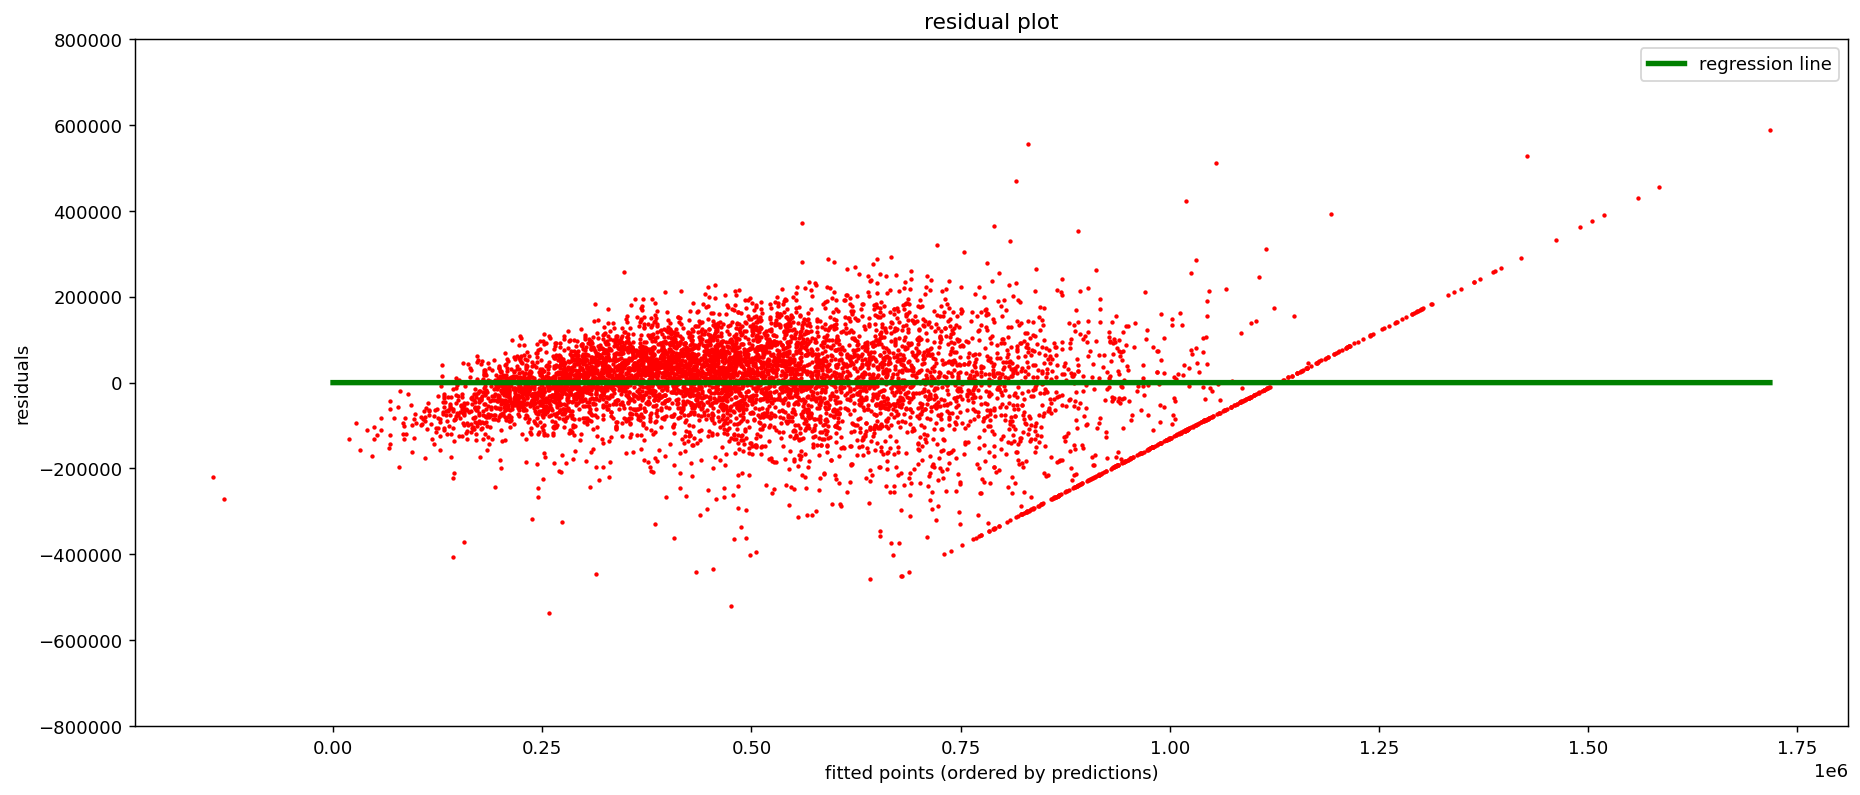

In [60]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

## Distribution of Errors

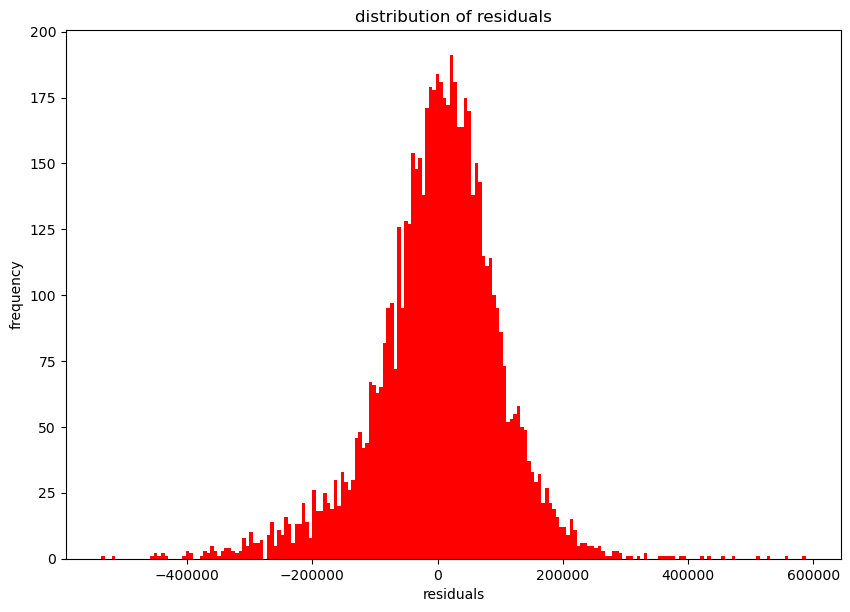

In [61]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

## Model Coefficients:

In [63]:
coefficients_table = pd.DataFrame({'column': X_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


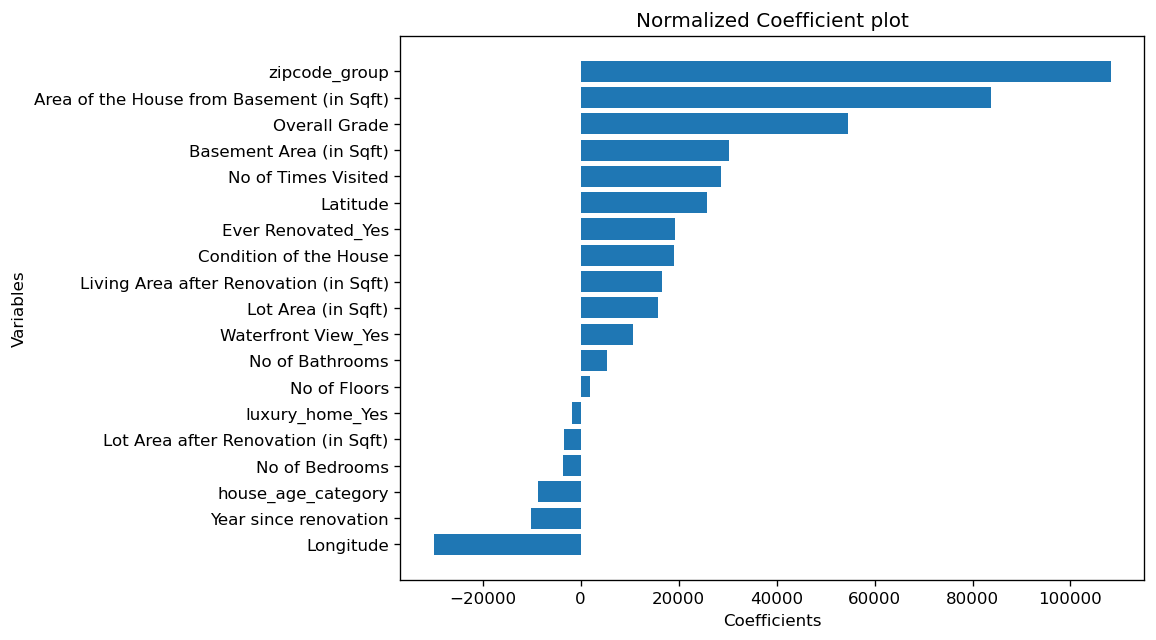

In [64]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()